# Przygotowanie Danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

datContent = pd.read_csv("data//spam.dat")
# iris = load_iris()
# datContent = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                         columns= iris['feature_names'] + ['target'])
datContent = datContent.rename(index=str, columns={"target": "K"})

In [3]:
datContent.head()

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME,K
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes


In [4]:
datContent.shape

(4789, 463)

# Przegląd modeli

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def countStats(_y_true, _y_pred):
    accuracy = accuracy_score(_y_true, _y_pred, normalize=True)
    precision = precision_score(_y_true, _y_pred, average='weighted')
    recall = recall_score(_y_true, _y_pred, average='weighted')
    fscore = f1_score(_y_true, _y_pred, average='weighted')
    
    return accuracy, precision, recall, fscore

In [26]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import confusion_matrix

def calculateStats(model, name, data):
    
    ConfusionMatrixY = []
    ConfusionMatrixYpred = []

    tAccuracy = 0
    tPrecision = 0
    tRecall = 0
    tFScore = 0

    for i in range(0, 5):
        kf = KFold(n_splits = 2, shuffle = True)
        result = next(kf.split(datContent), None)

        train1 = datContent.iloc[result[0]]
        test1 =  datContent.iloc[result[1]]
        train2 = datContent.iloc[result[1]]
        test2 =  datContent.iloc[result[0]]

        # fold 1
        clf = model
        Xtrain = train1.drop('K', axis = 1)
        Ytrain = train1.K
        clf.fit(Xtrain, Ytrain)

        Xtest = test1.drop('K', axis = 1)
        Ytest = test1.K
        YPred = clf.predict(Xtest)

        ConfusionMatrixY = Ytest.tolist()
        ConfusionMatrixYpred = YPred.tolist()

        accuracy, precision, recall, fscore = countStats(Ytest, YPred)
        tAccuracy += accuracy
        tPrecision += precision
        tRecall += recall
        tFScore += fscore

        #fold 2
        clf = model
        Xtrain = train1.drop('K', axis = 1)
        Ytrain = train1.K
        clf.fit(Xtrain, Ytrain)

        Xtest = test1.drop('K', axis = 1)
        Ytest = test1.K
        YPred = clf.predict(Xtest)

        ConfusionMatrixY = ConfusionMatrixY + Ytest.tolist()
        ConfusionMatrixYpred = ConfusionMatrixYpred + YPred.tolist()

        accuracy, precision, recall, fscore = countStats(Ytest, YPred)
        tAccuracy += accuracy
        tPrecision += precision
        tRecall += recall
        tFScore += fscore

    cm = confusion_matrix(ConfusionMatrixY, ConfusionMatrixYpred)
    return tAccuracy/10, tPrecision/10, tRecall/10, tFScore/10, cm

In [69]:
def plot_cm(cm):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm, cmap="Blues", annot=True)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Macierz konfuzji')

In [70]:
def do_the_thing(model, name, data):
    accuracy, precision, recall, fscore, cm = calculateStats(model, name, data)
    print(f'{name}:\n\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF-score: {fscore}')
    print(f'\nMacierz konfuzji:\n\n{cm}')
    plot_cm(cm)

SVM:

Accuracy: 0.9839665970772442
Precision: 0.984155045623236
Recall: 0.9839665970772442
F-score: 0.9839204634948058

Macierz konfuzji:

[[2934   12]
 [  52 1792]]


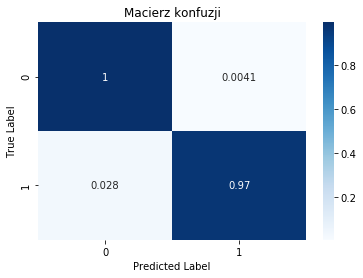

In [81]:
do_the_thing(model=svm.SVC(gamma='scale'), name='SVM', data=datContent)

KNN:

Accuracy: 0.9222546972860124
Precision: 0.9305052887839723
Recall: 0.9222546972860124
F-score: 0.9201809627523501

Macierz konfuzji:

[[2884    4]
 [ 434 1468]]


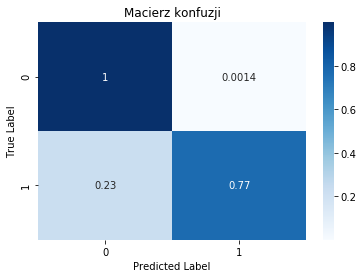

In [78]:
from sklearn.neighbors import KNeighborsClassifier

do_the_thing(KNeighborsClassifier(metric='euclidean'), name='KNN', data=datContent)

Decision Tree:

Accuracy: 0.9721503131524007
Precision: 0.9721743214917977
Recall: 0.9721503131524007
F-score: 0.9721333613265095

Macierz konfuzji:

[[2848   76]
 [  68 1798]]


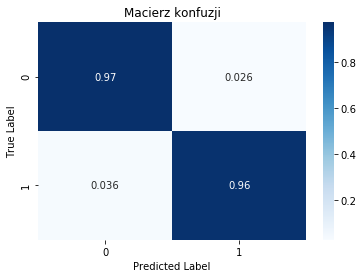

In [79]:
from sklearn.tree import DecisionTreeClassifier

do_the_thing(DecisionTreeClassifier(), name='Decision Tree', data=datContent)

Naive Bayes:

Accuracy: 0.9774530271398747
Precision: 0.9775114444379328
Recall: 0.9774530271398747
F-score: 0.977470934243289

Macierz konfuzji:

[[2928   62]
 [  52 1748]]


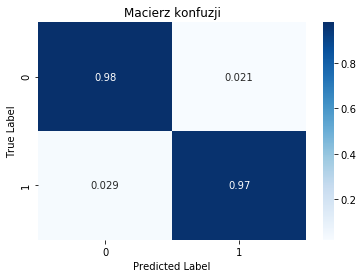

In [84]:
from sklearn.naive_bayes import MultinomialNB

do_the_thing(MultinomialNB(), name='Naive Bayes', data=datContent)

Multi-layer Perceptron:

Accuracy: 0.9820876826722337
Precision: 0.98217076053753
Recall: 0.9820876826722337
F-score: 0.9820571051902588

Macierz konfuzji:

[[2891   37]
 [  39 1823]]


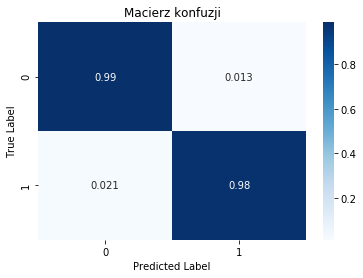

In [108]:
from sklearn.neural_network import MLPClassifier

do_the_thing(MLPClassifier(), name='Multi-layer Perceptron', data=datContent)

# Najlepsze do tej pory

In [88]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'KNN': KNeighborsClassifier(metric='euclidean'),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Multi-layer Perceptron': MLPClassifier()
}

all_fscores = []

for model in models:
    accuracy, precision, recall, fscore, cm = calculateStats(models[model], model, datContent)
    all_fscores.append(fscore)

Text(0.5, 1.0, 'F-sscore klasyfikatorów')

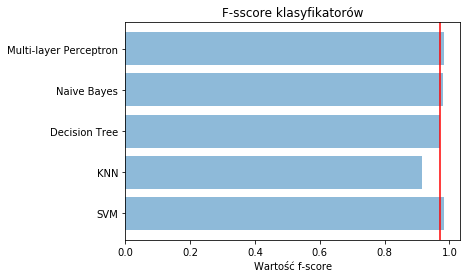

In [90]:
fig = plt.figure()

X = list(models.keys())
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')

**Do dalszej części przechodzą**:

 * Naive Bayes
 * Multi-layer Perceptron
 * SVM

# Hiperparametry

In [91]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'Naive Bayes': MultinomialNB(),
    'Multi-layer Perceptron': MLPClassifier()
}

(0.95, 1.0)

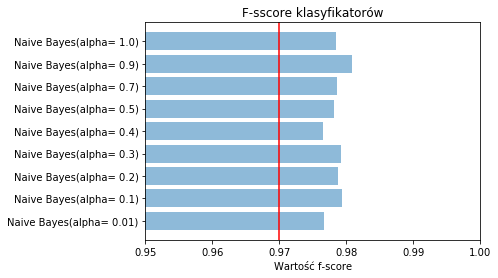

In [107]:
all_fscores = []
names = []
alphas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1.0]

for alpha_v in alphas:
    name = 'Naive Bayes(alpha= ' + str(alpha_v) + ')'
    accuracy, precision, recall, fscore, cm = calculateStats(MultinomialNB(alpha=alpha_v), name, datContent)
    all_fscores.append(fscore)
    names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

Naive Bayes(alpha=0.9):

Accuracy: 0.9788726513569938
Precision: 0.9788905372394238
Recall: 0.9788726513569938
F-score: 0.9788767909227645

Macierz konfuzji:

[[2932   40]
 [  50 1768]]


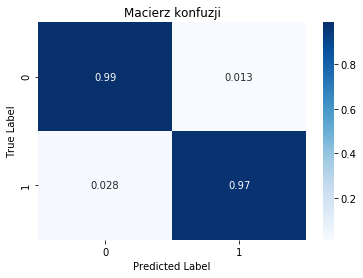

In [110]:
do_the_thing(MultinomialNB(alpha=0.9), name='Naive Bayes(alpha=0.9)', data=datContent)

(0.95, 1.0)

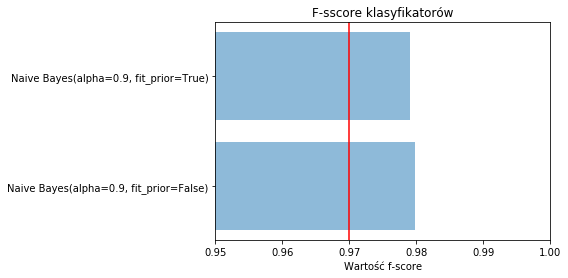

In [111]:
all_fscores = []
names = []
fit_priors = [False, True]

for fit_prior in fit_priors:
    name = 'Naive Bayes(alpha=0.9, fit_prior=' + str(fit_prior) + ')'
    accuracy, precision, recall, fscore, cm = calculateStats(MultinomialNB(alpha=0.9, fit_prior=fit_prior), name, datContent)
    all_fscores.append(fscore)
    names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

Naive Bayes(alpha=0.9, fit_prior=True):

Accuracy: 0.9789561586638831
Precision: 0.9789612692797484
Recall: 0.9789561586638831
F-score: 0.97895302336818

Macierz konfuzji:

[[2854   54]
 [  40 1842]]


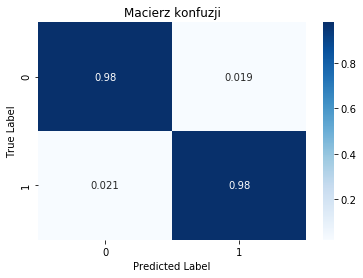

In [113]:
do_the_thing(MultinomialNB(alpha=0.9, fit_prior=True), name='Naive Bayes(alpha=0.9, fit_prior=True)', data=datContent)

(0.95, 1.0)

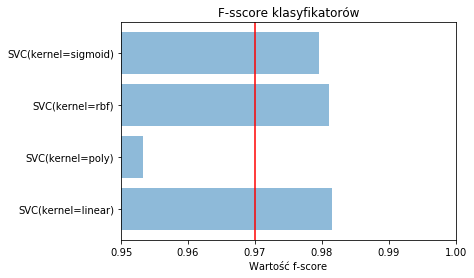

In [116]:
all_fscores = []
names = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    name = 'SVC(kernel=' + str(kernel) + ')'
    accuracy, precision, recall, fscore, cm = calculateStats(svm.SVC(kernel=kernel, gamma='scale'), name, datContent)
    all_fscores.append(fscore)
    names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

SVC(kernel=linear):

Accuracy: 0.9810438413361169
Precision: 0.9811346070040214
Recall: 0.9810438413361169
F-score: 0.9809991297583641

Macierz konfuzji:

[[2954   28]
 [  54 1754]]


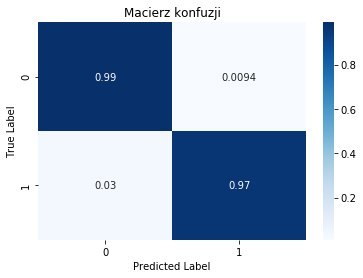

In [121]:
do_the_thing(svm.SVC(kernel='linear', gamma='scale'), name='SVC(kernel=linear)', data=datContent)

SVC(kernel=rbf):

Accuracy: 0.9818789144050104
Precision: 0.9820810781028957
Recall: 0.9818789144050104
F-score: 0.9818216836872355

Macierz konfuzji:

[[3004   20]
 [  64 1702]]


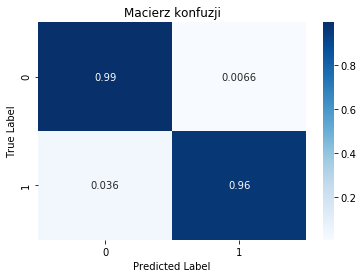

In [119]:
do_the_thing(svm.SVC(kernel='rbf', gamma='scale'), name='SVC(kernel=rbf)', data=datContent)

(0.95, 1.0)

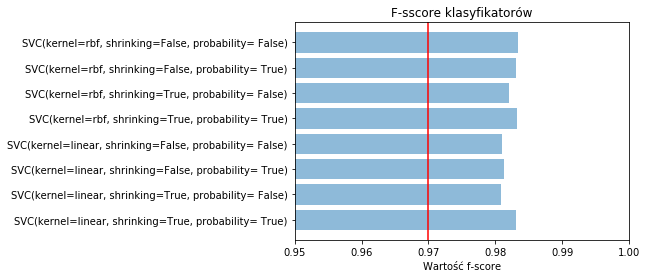

In [122]:
all_fscores = []
names = []
kernels = ['linear', 'rbf']
shrinkings = [True, False]
probabilities = [True, False]


for kernel in kernels:
    for shrinking in shrinkings:
        for probability in probabilities:
            name = 'SVC(kernel=' + str(kernel) + ', shrinking=' + str(shrinking) + ', probability= ' + str(probability) + ')'
            accuracy, precision, recall, fscore, cm = calculateStats(svm.SVC(kernel=kernel, gamma='scale', shrinking=shrinking, probability=probability), name, datContent)
            all_fscores.append(fscore)
            names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

SVC(kernel=rbf, shrinking=False, probability= False):

Accuracy: 0.9847181628392484
Precision: 0.9848453973291278
Recall: 0.9847181628392484
F-score: 0.9846800464334683

Macierz konfuzji:

[[2918   20]
 [  62 1790]]


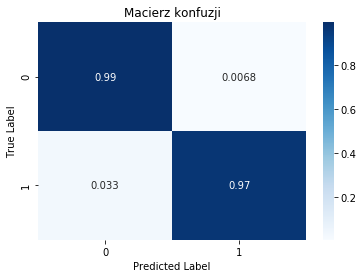

In [127]:
do_the_thing(svm.SVC(kernel='rbf', gamma='scale', shrinking=False, probability= False), name='SVC(kernel=rbf, shrinking=False, probability= False)', data=datContent)

In [ ]:
all_fscores = []
names = []
hidden_layer_sizess = [(100,), (200,100,50,), (50,25,10,), (100,50,25,)]
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
learning_rates = ['constant', 'invscaling', 'adaptive']


for hidden_layer_sizes in hidden_layer_sizess:
    for activation in activations:
        for solver in solvers:
            for learning_rate in learning_rates:
                name = 'MLPClassifier(hidden_layer_sizes=' + str(hidden_layer_sizes) + ', activation=' + str(activation) + ', solver= ' + str(solver) + ', learning_rate= ' + str(learning_rate) + ')'
                accuracy, precision, recall, fscore, cm = calculateStats(MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, learning_rate=learning_rate), name, datContent)
                all_fscores.append(fscore)
                names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

odp = dict(zip(names, all_fscores))
print(odp)

# Ranking cech

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

X = datContent.drop('K', axis = 1)
Y = datContent.K
test = SelectKBest(score_func=chi2, k=2)
test.fit(X, Y)

scores = []
num_features = len(X.columns)
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X.columns[i]))

sortedFeatures = sorted(scores, reverse = True)
sortedFeatures = list(map(lambda x: x[1], sortedFeatures))

In [20]:
feature_list = range(1, len(sortedFeatures) + 1)

print(feature_list)

range(1, 463)


In [68]:
X_new = pd.DataFrame(X_new) 
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [74]:
X_new.insert(20, "K", y, True) 

In [75]:
X_new.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,K,K
0,0,0,0,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,NaN,NaN
2,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,NaN,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,NaN,NaN


In [76]:
y.head()


0    yes
1     no
2    yes
3     no
4    yes
Name: K, dtype: object

In [77]:
y.shape

(4789,)

In [50]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2, mutual_info_classif

# test = SelectKBest(score_func=chi2, k=2)
# test.fit(X, y)

# scores = []
# num_features = len(X.columns)
# for i in range(num_features):
#     score = test.scores_[i]
#     scores.append((score, X.columns[i]))

# sortedFeatures = sorted(scores, reverse = True)
# sortedFeatures = list(map(lambda x: x[1], sortedFeatures))

In [51]:
# print (f'Features Ranking {sortedFeatures}')


In [52]:
# sns.set()
# sns.set_palette(sns.color_palette("hls", len(sortedFeatures)))
# sns.pairplot(datContent, vars=X.columns, hue='K', diag_kind='hist', dropna=True, kind='scatter')